<a href="https://colab.research.google.com/github/morteza-nouri/AI-TensorFlow/blob/main/AI_CA5_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Artificial Intelligence - Computer Assignment 5 - Phase 2**

> **Morteza Nouri, 810198481**

## __Gloals:__

## __Description:__

## **Part 1: Preprocess**



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!cp "/content/drive/MyDrive/A_Z Handwritten Data.csv" .

In [4]:
import pandas as pd


df = pd.read_csv('A_Z Handwritten Data.csv').astype('uint8')

The original data type of columns was int64 which consumed much memory, I change the columns type to unsigned 8 bit integer to lower the memory usage. <br>
(_*Note: unit8 is sufficient to represent the data in our dataset._)

In [5]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: uint8(785)
memory usage: 278.8 MB


,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# check for missing values in dataframe

df.isnull().sum()

0        0
0.1      0
0.2      0
0.3      0
0.4      0
        ..
0.644    0
0.645    0
0.646    0
0.647    0
0.648    0
Length: 785, dtype: int64

In [6]:
# function to get corresponding alphabet.(A-Z mapped to 0-25 in order in dataset)

def getAlphabet(n):
  return chr(n + 65)


In [7]:
import numpy as np

# construct labels
labels = df['0'].apply(getAlphabet)

# construct pixel data and reshape them to be 28*28
data = df.iloc[:,1:].values
data = data.reshape(-1, 28, 28)

working_df = pd.DataFrame({'Label': labels, 'data': [*data]})
working_df

,Label,data
0,A,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,A,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,A,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,A,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,A,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...
372445,Z,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
372446,Z,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
372447,Z,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
372448,Z,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


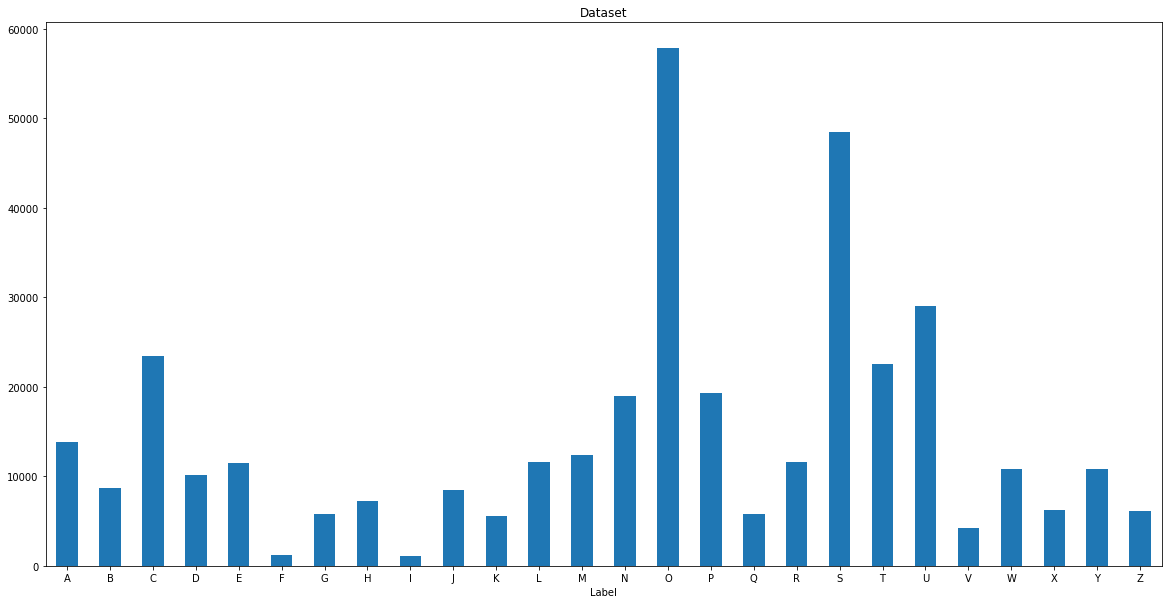

In [16]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20,10))
working_df.groupby('Label').size().plot(kind='bar', title='Dataset')
plt.xticks(rotation='horizontal')
plt.show()



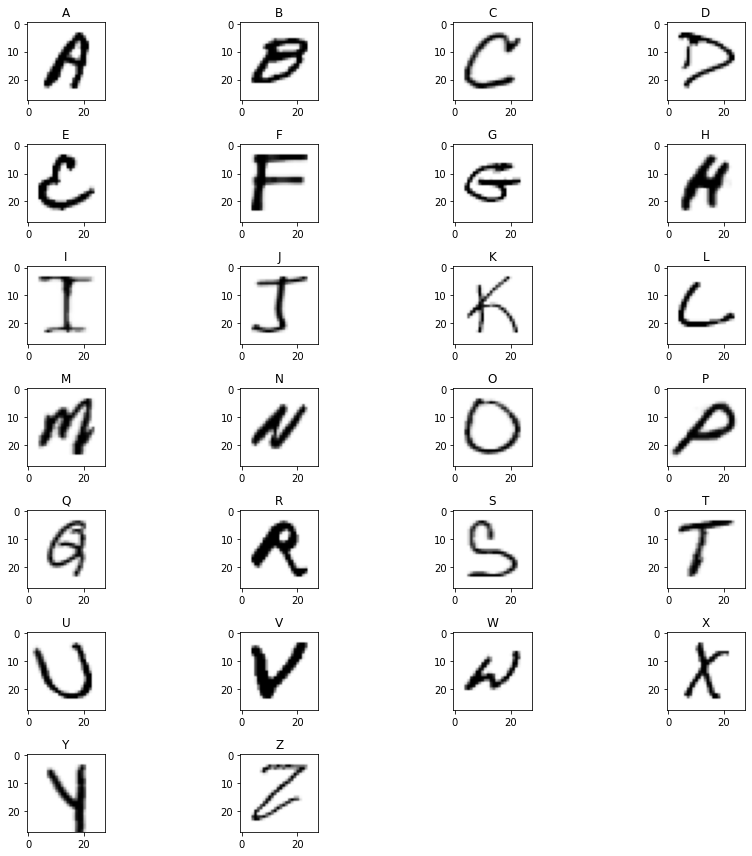

In [9]:
plt.figure(figsize=(12,12))
i = 0
for label, row in working_df.groupby('Label').first().iterrows():
    plt.subplot(7, 4, i + 1)
    plt.imshow(row['data'], cmap='Greys')
    plt.title(label)
    i += 1

plt.tight_layout()
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(working_df, test_size=0.2)


In [9]:
from sklearn.preprocessing import OneHotEncoder

oneHotEncoder = OneHotEncoder()

train_labels = oneHotEncoder.fit_transform(train[['Label']]).toarray()
test_labels = oneHotEncoder.fit_transform(test[['Label']]).toarray()

print("New shape of train labels:", train_labels.shape)
print("New shape of test labels:", test_labels.shape)


New shape of train labels: (297960, 26)
New shape of test labels: (74490, 26)


In [10]:
train_data = np.stack(train['data'].div(255)).reshape(-1, 28, 28, 1)
test_data = np.stack(test['data'].div(255)).reshape(-1, 28, 28, 1)

print("New shape of train data:", train_data.shape)
print("New shape of test labels:", test_data.shape)


New shape of train data: (297960, 28, 28, 1)
New shape of test labels: (74490, 28, 28, 1)


## **Part 2: Designing Neural Network**

In [11]:
from tensorflow import keras

def createLayers(activation):
  input = keras.layers.Input(shape=(28, 28, 1))
  output = keras.layers.Flatten()(input)
  output = keras.layers.Dense(256, activation=activation)(output)
  output = keras.layers.Dense(128, activation=activation)(output)
  output = keras.layers.Dense(26, activation='softmax')(output)
  return input, output

In [12]:
def createModel(input, output, optimizer, loss, epoch, momentum=0.01, learning_rate = 0.01, show_summary=True):
  main_model = keras.models.Model(inputs=input, outputs=output)
  if optimizer == 'SGD': 
    newOptimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=momentum)
  if optimizer == 'Adam':
    newOptimizer = keras.optimizers.Adam()
  main_model.compile(optimizer=newOptimizer, loss=loss, metrics=['accuracy'])
  if show_summary:
    main_model.summary()
  main_history = main_model.fit(train_data, train_labels, validation_data=(test_data, test_labels), epochs=epoch)
  return main_model, main_history

In [13]:
from sklearn.metrics import classification_report 

def showReport(model, model_history, train_data, test_data, train_labels, test_labels):
    train_pred = model.predict(train_data)
    test_pred = model.predict(test_data)

    print("Train:")
    print(classification_report(np.argmax(train_labels, axis=1) ,np.argmax(train_pred, axis=1), target_names=oneHotEncoder.get_feature_names_out()))
    print("Test:")
    print(classification_report(np.argmax(test_labels, axis=1), np.argmax(test_pred, axis=1), target_names=oneHotEncoder.get_feature_names_out()))

    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(model_history.history['accuracy'], color = 'c', label='Train')
    plt.plot(model_history.history['val_accuracy'], color = 'm', label='Test')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()

    plt.subplot(1,2,2)
    plt.plot(model_history.history['loss'], color = 'c', label='Train')
    plt.plot(model_history.history['val_loss'], color = 'm', label='Test')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

In [14]:
inputLayer, outputLayer = createLayers('relu')

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 26)                3354      
                                                                 
Total params: 237,210
Trainable params: 237,210
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
9312/9312 [==============================] -

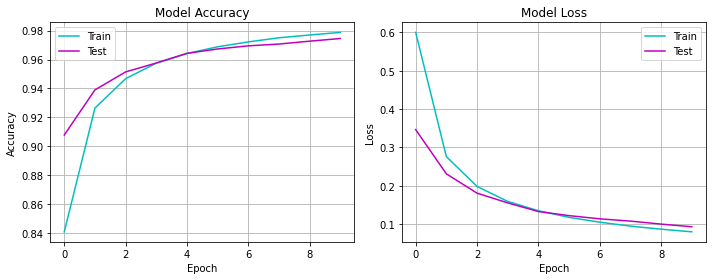

In [17]:
model, history = createModel(inputLayer, outputLayer, 'SGD', 'categorical_crossentropy', 10)
showReport(model, history, train_data, test_data, train_labels, test_labels)

## **Part 3: Training and Hyperparameter Tuning**

### **3.1: Effect of Optimizer**

- **What is momentum?** It is a popular technique used along with SGD to overcome the oscillations of noisy gradients and coast across flat spots of the search space. In this way, instead of just using the current gradient to update weights, the gradient of past steps accumulated with the momentum factor.

- __effect of momentum:__ By increasing momentum, the speed of our movement towards the optimal points increase, and the noise in derivatives tend to decrease. If the momentum is too high we'll overshoot the optimal points each time and never reach it. It's better to move slower as we get closer to the answer. Higher momentum will make the model almost random and also in each propagation the weights will change more rapidly which isn't what we want.

- __Adam vs SGD:__As we can observe from the below results, the accuracy differences in epochs in Adam in very small So Adam is faster to converge. SGD is slower but generalizes better because it has a lower gap between the curves of train and test loss.

- ### __momentum = 0.5__

Epoch 1/10
9312/9312 [==============================] - 30s 3ms/step - loss: 0.0802 - accuracy: 0.9782 - val_loss: 0.0923 - val_accuracy: 0.9746
Epoch 2/10
9312/9312 [==============================] - 28s 3ms/step - loss: 0.0708 - accuracy: 0.9807 - val_loss: 0.0840 - val_accuracy: 0.9767
Epoch 3/10
9312/9312 [==============================] - 30s 3ms/step - loss: 0.0627 - accuracy: 0.9828 - val_loss: 0.0828 - val_accuracy: 0.9768
Epoch 4/10
9312/9312 [==============================] - 28s 3ms/step - loss: 0.0563 - accuracy: 0.9846 - val_loss: 0.0815 - val_accuracy: 0.9772
Epoch 5/10
9312/9312 [==============================] - 28s 3ms/step - loss: 0.0505 - accuracy: 0.9860 - val_loss: 0.0719 - val_accuracy: 0.9808
Epoch 6/10
9312/9312 [==============================] - 29s 3ms/step - loss: 0.0455 - accuracy: 0.9877 - val_loss: 0.0680 - val_accuracy: 0.9822
Epoch 7/10
9312/9312 [==============================] - 28s 3ms/step - loss: 0.0409 - accuracy: 0.9889 - val_loss: 0.0680 - val_ac

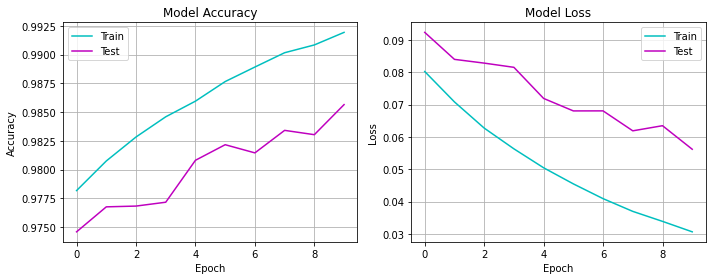

In [18]:
model, history = createModel(inputLayer, outputLayer, 'SGD', 'categorical_crossentropy', 10, 0.5, 0.01, False)
showReport(model, history, train_data, test_data, train_labels, test_labels)

- ### __momentum = 0.9__

Epoch 1/10
9312/9312 [==============================] - 30s 3ms/step - loss: 0.1022 - accuracy: 0.9690 - val_loss: 0.0923 - val_accuracy: 0.9726
Epoch 2/10
9312/9312 [==============================] - 46s 5ms/step - loss: 0.0651 - accuracy: 0.9800 - val_loss: 0.0696 - val_accuracy: 0.9801
Epoch 3/10
9312/9312 [==============================] - 41s 4ms/step - loss: 0.0492 - accuracy: 0.9846 - val_loss: 0.0693 - val_accuracy: 0.9810
Epoch 4/10
9312/9312 [==============================] - 28s 3ms/step - loss: 0.0388 - accuracy: 0.9878 - val_loss: 0.0616 - val_accuracy: 0.9826
Epoch 5/10
9312/9312 [==============================] - 28s 3ms/step - loss: 0.0311 - accuracy: 0.9902 - val_loss: 0.0543 - val_accuracy: 0.9856
Epoch 6/10
9312/9312 [==============================] - 29s 3ms/step - loss: 0.0265 - accuracy: 0.9914 - val_loss: 0.0546 - val_accuracy: 0.9857
Epoch 7/10
9312/9312 [==============================] - 30s 3ms/step - loss: 0.0217 - accuracy: 0.9929 - val_loss: 0.0487 - val_ac

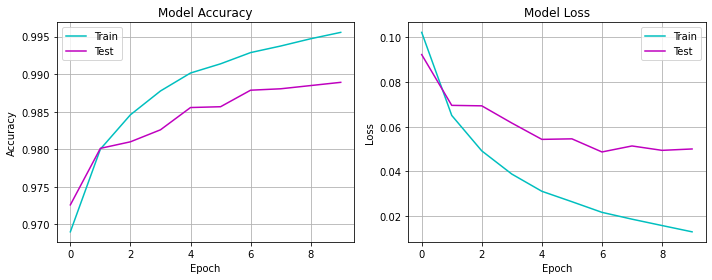

In [19]:
model, history = createModel(inputLayer, outputLayer, 'SGD', 'categorical_crossentropy', 10, 0.9, 0.01, False)
showReport(model, history, train_data, test_data, train_labels, test_labels)

- ### __momentum = 0.98__

Epoch 1/10
9312/9312 [==============================] - 29s 3ms/step - loss: 0.2819 - accuracy: 0.9278 - val_loss: 0.2360 - val_accuracy: 0.9435
Epoch 2/10
9312/9312 [==============================] - 28s 3ms/step - loss: 0.1892 - accuracy: 0.9528 - val_loss: 0.1944 - val_accuracy: 0.9522
Epoch 3/10
9312/9312 [==============================] - 28s 3ms/step - loss: 0.1705 - accuracy: 0.9585 - val_loss: 0.1859 - val_accuracy: 0.9595
Epoch 4/10
9312/9312 [==============================] - 30s 3ms/step - loss: 0.1633 - accuracy: 0.9614 - val_loss: 0.1826 - val_accuracy: 0.9575
Epoch 5/10
9312/9312 [==============================] - 28s 3ms/step - loss: 0.1475 - accuracy: 0.9655 - val_loss: 0.1870 - val_accuracy: 0.9614
Epoch 6/10
9312/9312 [==============================] - 29s 3ms/step - loss: 0.1447 - accuracy: 0.9672 - val_loss: 0.1849 - val_accuracy: 0.9615
Epoch 7/10
9312/9312 [==============================] - 28s 3ms/step - loss: 0.1503 - accuracy: 0.9671 - val_loss: 0.1874 - val_ac

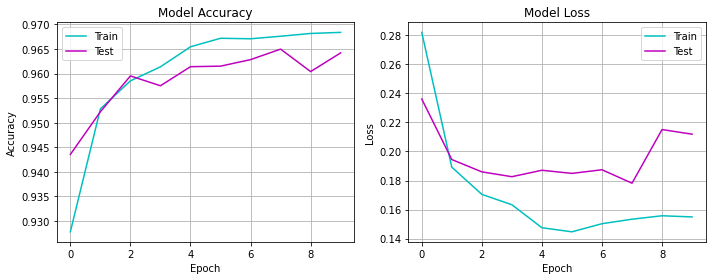

In [20]:
model, history = createModel(inputLayer, outputLayer, 'SGD', 'categorical_crossentropy', 10, 0.98, 0.01, False)
showReport(model, history, train_data, test_data, train_labels, test_labels)

- ### __Adam Optimizer__

Epoch 1/10
9312/9312 [==============================] - 31s 3ms/step - loss: 0.0305 - accuracy: 0.9910 - val_loss: 0.0780 - val_accuracy: 0.9851
Epoch 2/10
9312/9312 [==============================] - 29s 3ms/step - loss: 0.0282 - accuracy: 0.9917 - val_loss: 0.0743 - val_accuracy: 0.9865
Epoch 3/10
9312/9312 [==============================] - 30s 3ms/step - loss: 0.0277 - accuracy: 0.9924 - val_loss: 0.0925 - val_accuracy: 0.9855
Epoch 4/10
9312/9312 [==============================] - 30s 3ms/step - loss: 0.0270 - accuracy: 0.9928 - val_loss: 0.0836 - val_accuracy: 0.9864
Epoch 5/10
9312/9312 [==============================] - 30s 3ms/step - loss: 0.0243 - accuracy: 0.9931 - val_loss: 0.0897 - val_accuracy: 0.9863
Epoch 6/10
9312/9312 [==============================] - 30s 3ms/step - loss: 0.0263 - accuracy: 0.9930 - val_loss: 0.0945 - val_accuracy: 0.9866
Epoch 7/10
9312/9312 [==============================] - 29s 3ms/step - loss: 0.0244 - accuracy: 0.9936 - val_loss: 0.0938 - val_ac

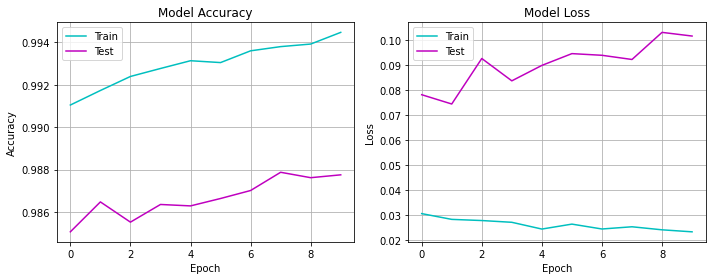

In [17]:
model, history = createModel(inputLayer, outputLayer, 'Adam', 'categorical_crossentropy', 10, 0.01, 0.01, False)
showReport(model, history, train_data, test_data, train_labels, test_labels)

### **3.2: Effect of epoch**

> It may occur in some neural networks that we get good accuracy just after one epoch. but it's important to note that gradient Descent is an iterative process so updating the weights with a single pass or one epoch leads to underfitting. There is a downside to the increasing number of epochs. It can casue model to be overfitted to train data. As a result, it will perform accurately on train dateset but poorly on test. There are two main approaches to mitigate such impact. First: Increase size of dataset so that minimum amount of epochs can be used to reach a optimal point. This act can be done by either gathering more data or tangling with current dataset to produce unseen data. Second: Consider output of the best performing epoch, whether it's the last one or not. This method is called early stopping.

Epoch 1/20
9312/9312 [==============================] - 30s 3ms/step - loss: 0.0247 - accuracy: 0.9944 - val_loss: 0.1035 - val_accuracy: 0.9885
Epoch 2/20
9312/9312 [==============================] - 29s 3ms/step - loss: 0.0238 - accuracy: 0.9945 - val_loss: 0.1216 - val_accuracy: 0.9864
Epoch 3/20
9312/9312 [==============================] - 30s 3ms/step - loss: 0.0234 - accuracy: 0.9948 - val_loss: 0.0975 - val_accuracy: 0.9894
Epoch 4/20
9312/9312 [==============================] - 30s 3ms/step - loss: 0.0235 - accuracy: 0.9948 - val_loss: 0.1075 - val_accuracy: 0.9887
Epoch 5/20
9312/9312 [==============================] - 29s 3ms/step - loss: 0.0238 - accuracy: 0.9950 - val_loss: 0.1168 - val_accuracy: 0.9895
Epoch 6/20
9312/9312 [==============================] - 30s 3ms/step - loss: 0.0229 - accuracy: 0.9951 - val_loss: 0.1151 - val_accuracy: 0.9897
Epoch 7/20
9312/9312 [==============================] - 30s 3ms/step - loss: 0.0232 - accuracy: 0.9951 - val_loss: 0.1265 - val_ac

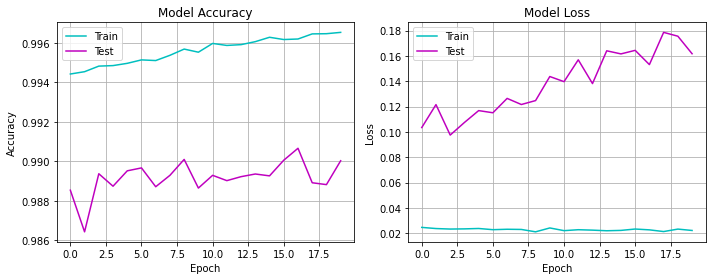

In [18]:
model, history = createModel(inputLayer, outputLayer, 'Adam', 'categorical_crossentropy', 20, 0.01, 0.01, False)
showReport(model, history, train_data, test_data, train_labels, test_labels)

### **Effect Loss Function**

> $ MSE = \frac 1 N {\sum_{i=1}^{D}(x_i-y_i)^2}$
- N is the total number of observations
- $y_i$  is the actual value of an observation and $x_i$ is our prediction

> $ CrossEntropy = -\sum_{c=1}^My_{o,c}\log(p_{o,c})$
- $M$ - number of classes
- $y$ - binary indicator (0 or 1) if class label c is the correct classification for observation $o$
- $p$ - predicted probability observation o is of class c

> MSE is mostly used in regression models and will perfom poorly when used in classification problems. There are two main reasons for this phenomenon. First one is that in MSE, it is presupposed that input data's distribution is normal when it reality it might not be! Here we have three categories. (If we had two, it would be called Bernoulli distribution) Second one is that if a binary classification model is trained with MSE Cost function, it is not guaranteed to minimize the Cost function. Main reason is that by using MSE there will be a expectation that values will be in range of (-inf, +inf) while model outputs are actually probabilities ranging from 0 to 1 and MSE will be severly

Epoch 1/10
9312/9312 [==============================] - 32s 3ms/step - loss: 4.6663e-04 - accuracy: 0.9933 - val_loss: 0.0011 - val_accuracy: 0.9849
Epoch 2/10
9312/9312 [==============================] - 31s 3ms/step - loss: 5.8868e-04 - accuracy: 0.9918 - val_loss: 0.0012 - val_accuracy: 0.9832
Epoch 3/10
9312/9312 [==============================] - 32s 3ms/step - loss: 6.7114e-04 - accuracy: 0.9907 - val_loss: 0.0012 - val_accuracy: 0.9830
Epoch 4/10
9312/9312 [==============================] - 31s 3ms/step - loss: 7.3098e-04 - accuracy: 0.9900 - val_loss: 0.0012 - val_accuracy: 0.9831
Epoch 5/10
9312/9312 [==============================] - 32s 3ms/step - loss: 7.5557e-04 - accuracy: 0.9896 - val_loss: 0.0013 - val_accuracy: 0.9826
Epoch 6/10
9312/9312 [==============================] - 31s 3ms/step - loss: 8.4808e-04 - accuracy: 0.9885 - val_loss: 0.0013 - val_accuracy: 0.9826
Epoch 7/10
9312/9312 [==============================] - 32s 3ms/step - loss: 8.8508e-04 - accuracy: 0.9880

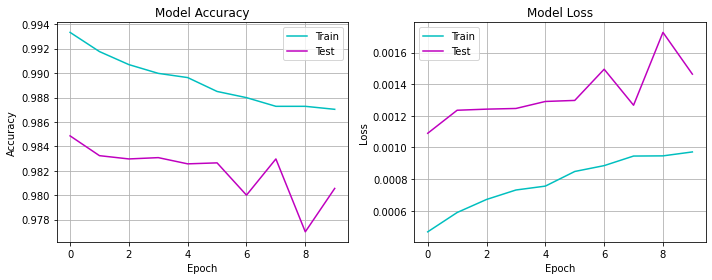

In [19]:
model, history = createModel(inputLayer, outputLayer, 'Adam', 'MSE', 10, 0.01, 0.01, False)
showReport(model, history, train_data, test_data, train_labels, test_labels)

### **Effect of Regularization**